In [43]:
from sklearn.datasets import load_digits
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import heapq

def normalize(A):
    stds = [np.std(A[r,:]) for r in range(A.shape[0])]
    for r in range(A.shape[0]):
        A[r,:] /= stds[r]
    return A

def centralize(A):
    means = [np.mean(A[r,:]) for r in range(A.shape[0])]
    for r in range(A.shape[0]):
        A[r,:] -= means[r]
    return A

def PCA(A, numComponents, norm = False):
    # First, center the data
    A = centralize(A)
    # If needed, normalize the data as well.
    if norm:
        A = normalize(A)
    
    # Now, compute the SVD, and reduce the dimensions of A.
    U, Sigma, Vt = np.linalg.svd(A)
    D = np.matmul(A.T, U[:,:numComponents])
    
    return D.T

def makeScatterPlot(title, pointsLists, colors):
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
     
    for i, pointsList in enumerate(pointsLists):
        currColor = colors[i]
        for point in pointsList:
            x, y = point
            ax.scatter(x, y, c=currColor)
        
    plt.title(title)
    plt.legend(loc=2)
    plt.show()
    
    

# Problem 1
Here is the code for the first problem:

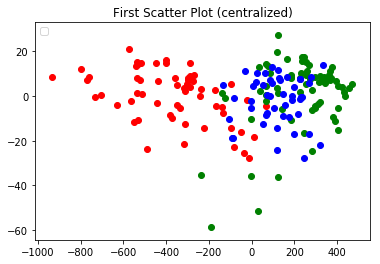

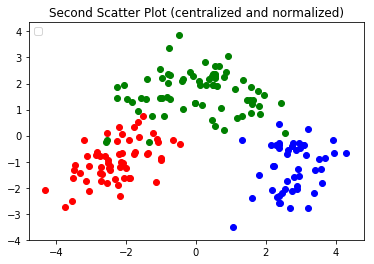

In [44]:
from sklearn.datasets import load_wine
def problemOne():
    samples, labels = load_wine(return_X_y=True)
    colSamples = samples.T
    
    # Parts 1-2 : centralize, do PCA, and make a scatter plot.
    PCAsamples = PCA(colSamples, 2)
    pointsLists = [[PCAsamples[:, i] for i, label in enumerate(labels) if label == target] for target in range(3)]
    colors = ["red", "green", "blue"]
    makeScatterPlot("First Scatter Plot (centralized)", pointsLists, colors)
    
    # Part 3: Normalize the centered wine dataset, and make another scatter plot
    nPCASamples = PCA(colSamples, 2, norm = True)
    nPointsLists = [[nPCASamples[:, i] for i, label in enumerate(labels) if label == target] for target in range(3)]
    colors = ["red", "green", "blue"]
    makeScatterPlot("Second Scatter Plot (centralized and normalized)", nPointsLists, colors)
    
    
problemOne()

IMO, the PCA features of the normalized and centralized data would be lead to better classification performance because the different colors are seperated more clearly.

# Problem 2
H